In [1]:
import tensorflow as tf
import keras
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import img_to_array

shared_dir = '/Users/prateek/Desktop/ML/Major/'
infected_dir = shared_dir + 'True_parasitized/'
uninfected_dir = shared_dir + 'True_uninfected/'
input_shape = [32, 32]
batch = 32

parasitized_data = os.listdir(infected_dir)
uninfected_data = os.listdir(uninfected_dir)

data = []
labels = []

for img in parasitized_data:
    try:
        img_read = plt.imread(infected_dir + img)
        img_resize = cv2.resize(img_read, input_shape)
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except :
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread(uninfected_dir + img)
        img_resize = cv2.resize(img_read, input_shape)
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

input_shape.append(3)
image_data = np.array(data)
labels = np.array(labels)

print("image_shape:", input_shape)
print("image_data:",len(image_data))
print("labels:",len(labels))

image_shape: [32, 32, 3]
image_data: 26161
labels: 26161


In [2]:
import tensorflow as tf

from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims

def data_agument(image):
    datagen = ImageDataGenerator(featurewise_center=True,rotation_range=(0-30),width_shift_range=0.2,
                             height_shift_range=0.2,brightness_range=[0.5,1.5],
                             shear_range=0.2, zoom_range=0.2,channel_shift_range=0.2,
                             horizontal_flip=True, vertical_flip=True,fill_mode='nearest')
    
    it = datagen.flow(expand_dims(image, 0), batch_size=1)
    
    images = []
    for x in range(10):
      batch = it.next()
      img = batch[0].astype('uint8')
      images.append(img)
    return images


In [3]:
# import numpy as np
# import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

# for images, labels in training_set.take(1):
#     cv2_imshow(images[0].numpy().astype('int32'))
#     plt.figure(figsize=(12, 12))
#     first_image = images[0]
#     for i in range(12):
#         ax = plt.subplot(3, 4, i + 1)
#         augmented_image = data_augmentation(
#             tf.expand_dims(first_image, 0)
#         )
#         plt.imshow(augmented_image[0].numpy().astype("int32"))
#         plt.axis("off")

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras import Model, Input
from keras.applications.xception import Xception, preprocess_input
from keras.callbacks import LearningRateScheduler
import numpy as np

epochs = 100
dropout_rate = 0.2
len_classes = 5
images = []

inputs = Input(shape=input_shape)
x = preprocess_input(inputs)
x = Conv2D(64, kernel_size=(3, 3),activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, kernel_size=(4, 4),activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, kernel_size=(3, 3),activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(1)(x)
model = Model(inputs, outputs)
model.summary()

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss=keras.losses.BinaryCrossentropy(from_logits=True),metrics=keras.metrics.BinaryAccuracy())

2022-04-24 12:05:58.871587: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-24 12:05:58.871783: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 32, 32, 3)        0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 32, 32, 3)        0         
 a)                                                              
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                

In [5]:
history = model.fit(image_data, labels, epochs=epochs, validation_split=0.2)

Epoch 1/100


2022-04-24 12:06:00.304054: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-24 12:06:01.327570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


654/654 [==============================] - ETA: 0s - loss: 0.6611 - binary_accuracy: 0.5061

2022-04-24 12:06:26.256692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


654/654 [==============================] - 29s 36ms/step - loss: 0.6611 - binary_accuracy: 0.5061 - val_loss: 0.9889 - val_binary_accuracy: 0.0000e+00
Epoch 2/100
654/654 [==============================] - 23s 35ms/step - loss: 0.6607 - binary_accuracy: 0.5314 - val_loss: 1.0769 - val_binary_accuracy: 0.0000e+00
Epoch 3/100
163/654 [======>.......................] - ETA: 15s - loss: 0.6631 - binary_accuracy: 0.5562

KeyboardInterrupt: 

loss
binary_accuracy
val_loss
val_binary_accuracy
lr


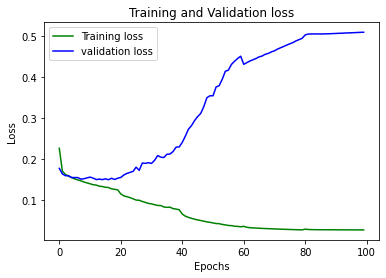

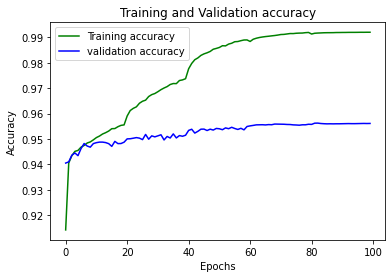

In [ ]:
import matplotlib.pyplot as plt

for key in history.history.keys():
    print(key)
loss_train = history.history['loss']
loss_val = history.history['val_loss']
no_epochs = range(epochs)
plt.plot(no_epochs, loss_train, 'g', label='Training loss')
plt.plot(no_epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss_train = history.history['binary_accuracy']
loss_val = history.history['val_binary_accuracy']
plt.plot(no_epochs, loss_train, 'g', label='Training accuracy')
plt.plot(no_epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=tf.keras.metrics.BinaryAccuracy())
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
# rm -rf logs
%load_ext tensorboard
log_folder = 'logs'
callbacks = [
            EarlyStopping(patience = 5),
            TensorBoard(log_dir=log_folder)
            ]

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
# rm -rf logs
%load_ext tensorboard
log_folder = 'logs'
callbacks = [
            EarlyStopping(patience = 5),
            TensorBoard(log_dir=log_folder)
            ]
model.fit(training_set, epochs=epochs,validation_data=val_dataset,callbacks=callbacks)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/100
4711/4711 [==============================] - 75s 16ms/step - loss: 0.0252 - binary_accuracy: 0.9924 - val_loss: 0.5137 - val_binary_accuracy: 0.9559
Epoch 2/100
4711/4711 [==============================] - 76s 16ms/step - loss: 0.0250 - binary_accuracy: 0.9925 - val_loss: 0.5150 - val_binary_accuracy: 0.9560
Epoch 3/100
4711/4711 [==============================] - 76s 16ms/step - loss: 0.0249 - binary_accuracy: 0.9925 - val_loss: 0.5183 - val_binary_accuracy: 0.9559
Epoch 4/100
4711/4711 [==============================] - 77s 16ms/step - loss: 0.0247 - binary_accuracy: 0.9926 - val_loss: 0.5204 - val_binary_accuracy: 0.9559
Epoch 5/100
4711/4711 [==============================] - 76s 16ms/step - loss: 0.0246 - binary_accuracy: 0.9926 - val_loss: 0.5218 - val_binary_accuracy: 0.9558
Epoch 6/100
4711/4711 [==============================] - 77s 16ms/step - loss: 0.0244 - binary_accuracy: 